In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import LabelEncoder
import random
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import zscore as zsc
from sklearn.preprocessing import StandardScaler

In [2]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width',None)
#pd.set_option('display.max_colwidth', -1)

In [3]:
ds = pd.read_csv("classic_car.csv")
df = pd.DataFrame(ds)
df = df.drop(ds.columns[0], axis=1)
df.head(50)

,Make,Series,Model,Manufacturer code,First registration date,Year of manufacture,Mileage (read),Chassis number,Engine number,Gearbox number,...,Cylinders,Doors,Steering,Gearbox,Gears,Transmission,Front breaks,Rear breaks,Fuel type,Price (£)
0,Chevrolet,Corvette,Corvette Stingray,C3 Serie II,01/1977,1977,"69,000 km",Not provided,CKZ,Not provided,...,8,2,Left (LHD),Manual,Not provided,Rear,Disc,Disc,Petrol,"32,634"
1,Lancia,Delta,Delta HF 4WD,831,02/1987,1987,"189,000 km",Not provided,Not provided,Not provided,...,4,4,Left (LHD),Manual,Not provided,4WD,Not provided,Not provided,Petrol,"28,631"
2,Volkswagen,Golf,Golf Mk II 1.3,Typ 19E,05/1985,1985,"107,000 km",Not provided,Not provided,Not provided,...,4,5,Left (LHD),Manual,Not provided,Front,Disc,Drum,Petrol,"2,524"
3,FIAT,1100,1100-103 TV,Series II,05/1954,1954,"1,000 km",Not provided,Not provided,Not provided,...,4,4,Left (LHD),Manual,Not provided,Rear,Not provided,Not provided,Petrol,rice on request
4,Jaguar,XJ S,XJR-S V12 Le Mans,Typ 11,05/1989,1989,"87,500 mls",Not provided,Not provided,Not provided,...,12,2,Right (RHD),Automatic,3,Rear,Disc,Disc,Petrol,"25,237"
5,FIAT,1500,1500 L,Tipo 105,08/1963,1963,"68,000 km",Not provided,Not provided,Not provided,...,4,4,Left (LHD),Manual,Not provided,Rear,Not provided,Not provided,Petrol,"5,134"
6,Innocenti,Mini,Mini Cooper 1000,Serie II,01/1972,1972,"4,200 km",Not provided,Not provided,Not provided,...,4,2,Left (LHD),Manual,Not provided,Front,Not provided,Not provided,Petrol,"12,096"
7,Volkswagen,Beetle,Beetle 1303,Typ 17,01/1974,1974,"68,000 km",Not provided,Not provided,Not provided,...,4,2,Left (LHD),Manual,Not provided,Rear,Not provided,Not provided,Petrol,"13,837"
8,Alfa Romeo,GTV,2000 GT Veloce,Y3,01/1972,1972,"1,000 km",Not provided,Not provided,Not provided,...,4,2,Left (LHD),Manual,5,Rear,Disc,Not provided,Petrol,"30,458"
9,FIAT,Appia,126,116E,01/1973,1973,"41,600 km",Not provided,Not provided,Not provided,...,2,2,Left (LHD),Manual,Not provided,Rear,Not provided,Not provided,Petrol,"6,005"


# Chương II: Sắp xếp dữ liệu

## 1.Thay thế các giá trị bị khuyết bằng giá trị NaN và thống kê giá trị bị khuyết ở từng biến

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Make                     11100 non-null  object
 1   Series                   9152 non-null   object
 2   Model                    11100 non-null  object
 3   Manufacturer code        6339 non-null   object
 4   First registration date  11100 non-null  object
 5   Year of manufacture      11100 non-null  int64 
 6   Mileage (read)           11100 non-null  object
 7   Chassis number           11094 non-null  object
 8   Engine number            11091 non-null  object
 9   Gearbox number           11088 non-null  object
 10  Matching numbers         11100 non-null  object
 11  Previous owners          11100 non-null  object
 12  Body style               11100 non-null  object
 13  Power (kW/hp)            11100 non-null  object
 14  Cubic capacity (ccm)     11099 non-nul

In [5]:
df.replace(to_replace = ["Not provided", "rice on request", "Not specified"], value = np.nan, inplace = True)

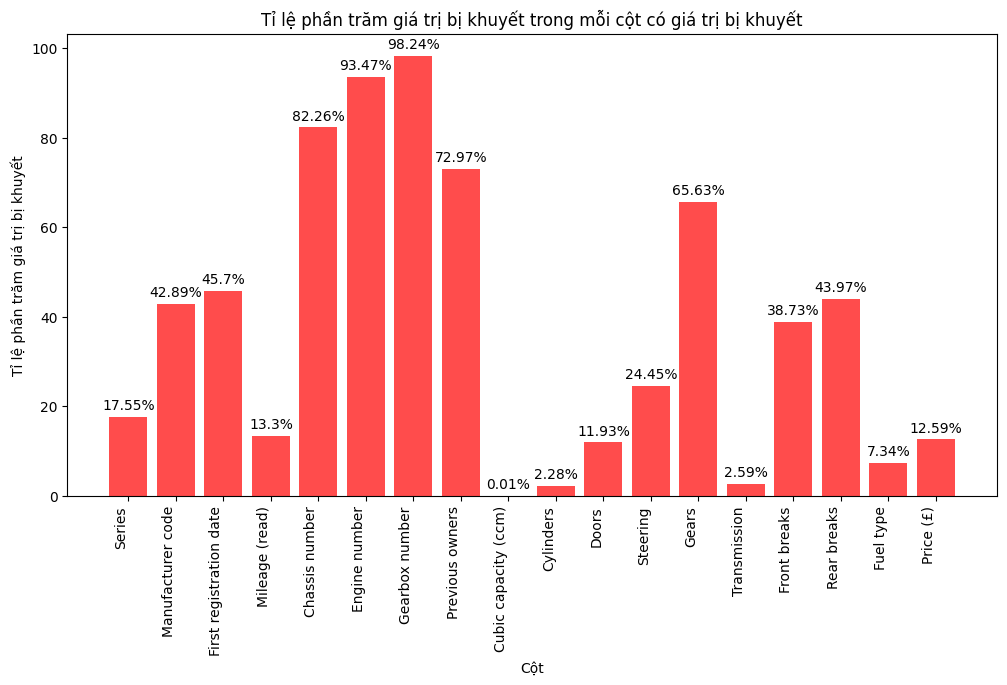

In [6]:
missing_percentages = (df.isnull().mean() * 100).round(2)

# Lọc ra các cột có giá trị bị khuyết
missing_columns = missing_percentages[missing_percentages > 0]

# Xác định màu cho cột có giá trị bị khuyết
colors = ['red' for _ in missing_columns]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
bars = plt.bar(missing_columns.index, missing_columns, color=colors, alpha=0.7)

# Thêm nhãn phần trăm và tên cột vào trục tung

for bar, value in zip(bars, missing_columns):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 1, f'{value}%', ha='center', va='bottom', color='black')

plt.title('Tỉ lệ phần trăm giá trị bị khuyết trong mỗi cột có giá trị bị khuyết')
plt.xlabel('Cột')
plt.ylabel('Tỉ lệ phần trăm giá trị bị khuyết')
plt.xticks(rotation=90, ha='right')
plt.show()

<div style="border-bottom: 3px solid #000000 ; margin-bottom: 0px;"></div>

## 2. Xóa bớt một số cột và hàng có nhiều giá trị bị khuyết

In [7]:
df = df.drop(['Series','Engine number', 'Gearbox number','Manufacturer code', 'Chassis number', 'Matching numbers', 'First registration date'], axis = 1)

In [8]:
df = df.dropna(subset=['Previous owners','Gears','Price (£)', 'Cylinders','Doors','Steering','Transmission','Front breaks', 'Rear breaks', 'Fuel type'])

<div style="border-bottom: 3px solid #000000 ; margin-bottom: 0px;"></div>

## 3. Định dạng dữ liệu

`Previous owners`: Các giá trị > 6 đổi về 7

In [9]:
#df['Previous owners'].unique()

In [10]:
#df['Previous owners'].replace(to_replace = "> 6", value = "7", inplace = True)

---

`Mileage (read)`: Đổi toàn bộ về đơn vị dặm

In [11]:
df['Mileage (read)']

24        99,800 km
69        82,000 km
78       201,000 km
79        60,000 km
96       161,000 km
            ...    
10908         7 mls
10951    72,018 mls
10968    119,895 km
10998           NaN
11081           NaN
Name: Mileage (read), Length: 695, dtype: object

In [12]:
def convert_to_mls(list_km):
    temp = []
    list_km = list_km.astype(str)
    for item in list_km:
        unit = item.split()
        unit[0]= unit[0].replace(',', '')
        if(len(unit) > 1 and unit[1] == 'km'):
            unit[0] = float(unit[0])* 0.621371192
            unit[0] = int(round(unit[0]))
        temp.append(unit[0])
    return temp


In [13]:
df['Mileage (read)'] = convert_to_mls(df['Mileage (read)'])
df['Mileage (read)'].replace(to_replace = 'nan', value = np.nan, inplace = True)
df['Mileage (read)'] = df['Mileage (read)'].astype('float')

In [14]:
df['Mileage (read)']

24        62013.0
69        50952.0
78       124896.0
79        37282.0
96       100041.0
           ...   
10908         7.0
10951     72018.0
10968     74499.0
10998         NaN
11081         NaN
Name: Mileage (read), Length: 695, dtype: float64

--- 

`Power (kW/hp)` đổi thành cột `Horsepower`: lấy giá trị `hp` bên ngoài không lấy Factory

In [15]:
df['Power (kW/hp)']

24       185/251 (Factory: 165/224)
69                           93/127
78                          108/147
79                          151/205
96                          110/150
                    ...            
10908                       357/485
10951                        74/100
10968                       170/231
10998                        96/130
11081                       249/339
Name: Power (kW/hp), Length: 695, dtype: object

In [16]:
temp = []
temp_T = []
for item in df['Power (kW/hp)']:
    unit_P = item.split(' ')
    temp.append(unit_P[0])
for item in temp:
    unit_T = item.split('/')
    temp_T.append(unit_T[1])

In [17]:
len(temp_T)

695

In [18]:
df = df.rename(columns = {'Power (kW/hp)': 'Horsepower'})
df['Horsepower'] = temp_T

In [19]:
df['Horsepower']

24       251
69       127
78       147
79       205
96       150
        ... 
10908    485
10951    100
10968    231
10998    130
11081    339
Name: Horsepower, Length: 695, dtype: object

---

`Cubic Capacity (ccm)`:

In [20]:
df.columns

Index(['Make', 'Model', 'Year of manufacture', 'Mileage (read)',
       'Previous owners', 'Body style', 'Horsepower', 'Cubic capacity (ccm)',
       'Cylinders', 'Doors', 'Steering', 'Gearbox', 'Gears', 'Transmission',
       'Front breaks', 'Rear breaks', 'Fuel type', 'Price (£)'],
      dtype='object')

In [21]:
df['Cubic capacity (ccm)']

24       1781
69       1962
78       2849
79       2906
96       2496
         ... 
10908    5935
10951    2000
10968    4973
10998    2341
11081    4367
Name: Cubic capacity (ccm), Length: 695, dtype: object

In [22]:
temp_CCM = []
for item in df['Cubic capacity (ccm)']:
    unit_CCM = item.split(' ')
    temp_CCM.append(unit_CCM[0])
df['Cubic capacity (ccm)'] = temp_CCM

In [23]:
df['Cubic capacity (ccm)']

24       1781
69       1962
78       2849
79       2906
96       2496
         ... 
10908    5935
10951    2000
10968    4973
10998    2341
11081    4367
Name: Cubic capacity (ccm), Length: 695, dtype: object

---

`price`:

In [24]:
df['Price (£)']

24        14,785
69        21,321
78        23,061
79       126,183
96        46,122
          ...   
10908    450,000
10951     29,501
10968     27,804
10998     86,936
11081     35,995
Name: Price (£), Length: 695, dtype: object

In [25]:
import re
def remove_parentheses(text):
    text_without_parentheses = re.sub(r',', '', text)
    return text_without_parentheses

In [26]:
temp_Pr = []
for item in df['Price (£)']:
    temp_Pr.append(remove_parentheses(item))
df['Price (£)'] = temp_Pr

In [27]:
df['Price (£)']

24        14785
69        21321
78        23061
79       126183
96        46122
          ...  
10908    450000
10951     29501
10968     27804
10998     86936
11081     35995
Name: Price (£), Length: 695, dtype: object

<div style="border-bottom: 3px solid #000000 ; margin-bottom: 0px;"></div>

## 4. Chuyển các cột dữ liệu từ object về int

In [28]:
int_cols = ['Horsepower', 'Cubic capacity (ccm)','Price (£)', 'Year of manufacture']
df[int_cols] = df[int_cols].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 24 to 11081
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  695 non-null    object 
 1   Model                 695 non-null    object 
 2   Year of manufacture   695 non-null    int64  
 3   Mileage (read)        663 non-null    float64
 4   Previous owners       695 non-null    object 
 5   Body style            695 non-null    object 
 6   Horsepower            695 non-null    int64  
 7   Cubic capacity (ccm)  695 non-null    int64  
 8   Cylinders             695 non-null    object 
 9   Doors                 695 non-null    object 
 10  Steering              695 non-null    object 
 11  Gearbox               695 non-null    object 
 12  Gears                 695 non-null    object 
 13  Transmission          695 non-null    object 
 14  Front breaks          695 non-null    object 
 15  Rear breaks         

In [29]:
df = df.reset_index(drop=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  695 non-null    object 
 1   Model                 695 non-null    object 
 2   Year of manufacture   695 non-null    int64  
 3   Mileage (read)        663 non-null    float64
 4   Previous owners       695 non-null    object 
 5   Body style            695 non-null    object 
 6   Horsepower            695 non-null    int64  
 7   Cubic capacity (ccm)  695 non-null    int64  
 8   Cylinders             695 non-null    object 
 9   Doors                 695 non-null    object 
 10  Steering              695 non-null    object 
 11  Gearbox               695 non-null    object 
 12  Gears                 695 non-null    object 
 13  Transmission          695 non-null    object 
 14  Front breaks          695 non-null    object 
 15  Rear breaks           6

<div style="border-bottom: 3px solid #000000 ; margin-bottom: 0px;"></div>

## 5. Điền khuyết giá trị null của biến `Mileage (read)` bằng phương pháp KNNImputer:

In [31]:
df[df['Mileage (read)'].isna()]

,Make,Model,Year of manufacture,Mileage (read),Previous owners,Body style,Horsepower,Cubic capacity (ccm),Cylinders,Doors,Steering,Gearbox,Gears,Transmission,Front breaks,Rear breaks,Fuel type,Price (£)
51,BMW,M5,1999,NaN,2,Saloon (4-doors),400,4941,8,4,Left (LHD),Manual,6,Rear,Disc,Disc,Petrol,52127
87,Mercedes-Benz,220 S,1959,NaN,> 6,Saloon (4-doors),106,2195,6,4,Right (RHD),Manual,4,Rear,Drum,Drum,Petrol,18971
100,Mercedes-Benz,220 S Cabriolet,1957,NaN,2,Convertible,106,2195,6,2,Left (LHD),Manual,4,Rear,Drum,Drum,Petrol,75710
104,Land Rover,Defender 90,1997,NaN,1,4x4,113,2495,4,3,Left (LHD),Manual,5,4WD,Disc,Disc,Diesel,44365
117,Austin-Healey,Sprite Mk I,1959,NaN,2,Convertible (Roadster),44,948,4,2,Left (LHD),Manual,4,Rear,Disc,Drum,Petrol,22404
119,FIAT,850 Super,1965,NaN,2,Saloon (2-doors),37,843,4,2,Right (RHD),Manual,4,Rear,Drum,Drum,Petrol,8702
173,Rover,"Mini ""Knightsbridge""",2001,NaN,2,Saloon (2-doors),63,1275,4,2,Right (RHD),Manual,4,Front,Disc,Disc,Petrol,25933
182,Porsche,911 Carrera 3.2,1988,NaN,1,Coupe,217,3164,6,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,87023
185,Renault,Twingo,1995,NaN,1,Small car (Small Car),55,1239,4,3,Left (LHD),Manual,5,Front,Disc,Drum,Petrol,6266
215,Mercedes-Benz,190,1958,NaN,1,Saloon (4-doors),75,1897,4,4,Left (LHD),Manual,4,Rear,Drum,Drum,Petrol,8615


In [32]:
from sklearn.impute import KNNImputer

In [33]:
imputer = KNNImputer(n_neighbors = 100 )
df['Mileage (read)'] = imputer.fit_transform(df[['Mileage (read)']])

In [34]:
df['Mileage (read)'] = df['Mileage (read)'].astype(int)
int_cols.append('Mileage (read)')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Make                  695 non-null    object
 1   Model                 695 non-null    object
 2   Year of manufacture   695 non-null    int64 
 3   Mileage (read)        695 non-null    int64 
 4   Previous owners       695 non-null    object
 5   Body style            695 non-null    object
 6   Horsepower            695 non-null    int64 
 7   Cubic capacity (ccm)  695 non-null    int64 
 8   Cylinders             695 non-null    object
 9   Doors                 695 non-null    object
 10  Steering              695 non-null    object
 11  Gearbox               695 non-null    object
 12  Gears                 695 non-null    object
 13  Transmission          695 non-null    object
 14  Front breaks          695 non-null    object
 15  Rear breaks           695 non-null    ob

# Chương III:  Thăm dò dữ liệu

## 1. Các cột kiểu số

### 1.1. Plot các biến kiểu số 

In [37]:
num_cols_df = df.select_dtypes(include = 'number')
num_cols_df

,Year of manufacture,Mileage (read),Horsepower,Cubic capacity (ccm),Price (£)
0,2000,62013,251,1781,14785
1,1979,50952,127,1962,21321
2,1990,124896,147,2849,23061
3,1981,37282,205,2906,126183
4,1966,100041,150,2496,46122
...,...,...,...,...,...
690,2000,7,485,5935,450000
691,1959,72018,100,2000,29501
692,1983,74499,231,4973,27804
693,1971,47508,130,2341,86936


In [38]:
len(num_cols_df.columns)

5

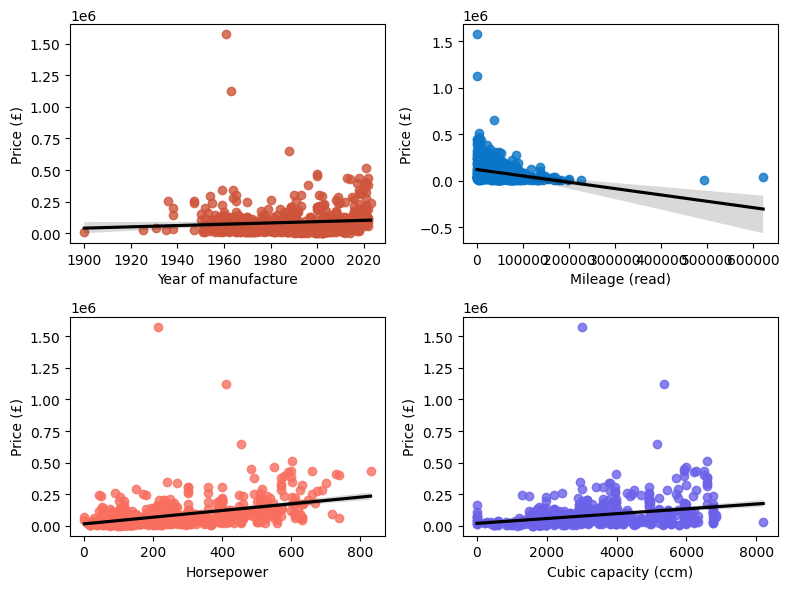

In [39]:
def reg_plot(dataframe):
    length = len(dataframe.columns) - 1
    #k = random.randint(2, length//2)
    #while (length%k != 0):
        #k = random.randint(2,length//2)
    #x = length // k
    flag = True
    while(flag == True):
        k = random.randint(2,length//2)
        if(length%k == 0):
            flag = False
    height_ratios = [3] * (length // k)
    width_ratios = [4] * k
    #fig, axes = plt.subplots(length//k, k , figsize=(20, 15))
    fig, axes = plt.subplots(length // k, k, figsize=(sum(width_ratios), sum(height_ratios)),
                             gridspec_kw={'height_ratios': height_ratios, 'width_ratios': width_ratios})
    
    for i, column in enumerate([col for col in dataframe if col != "Price (£)"]):
        colors_1 = random.random()
        colors_2 = random.random()
        colors_3 = random.random()
        sns.regplot(data=dataframe, x=column, y="Price (£)", ax=axes[i // k, i % k], color = (colors_1,colors_2,colors_3),
                   line_kws={'color': 'black'}) 
        plt.tight_layout()

reg_plot(num_cols_df)
plt.show()

### 1.2. Tìm giá trị ngoại lai và xóa ra khỏi DataFrame

In [40]:
for col in int_cols:
    outarea = df[col]
    Q1 = outarea.quantile(0.25)
    Q3 = outarea.quantile(0.75)
    I = Q3 - Q1
    Min = Q1 - 1.5 * I
    Max = Q3 + 1.5 * I
    num_cols_df = num_cols_df[((outarea >= Min) & (outarea <= Max))]


/var/folders/_0/q7r175hj2m34g8xl8vtw_ycw0000gn/T/ipykernel_4406/2404849497.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_cols_df = num_cols_df[((outarea >= Min) & (outarea <= Max))]
/var/folders/_0/q7r175hj2m34g8xl8vtw_ycw0000gn/T/ipykernel_4406/2404849497.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_cols_df = num_cols_df[((outarea >= Min) & (outarea <= Max))]
/var/folders/_0/q7r175hj2m34g8xl8vtw_ycw0000gn/T/ipykernel_4406/2404849497.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_cols_df = num_cols_df[((outarea >= Min) & (outarea <= Max))]
/var/folders/_0/q7r175hj2m34g8xl8vtw_ycw0000gn/T/ipykernel_4406/2404849497.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_cols_df = num_cols_df[((outarea >= Min) & (outarea <= Max))]


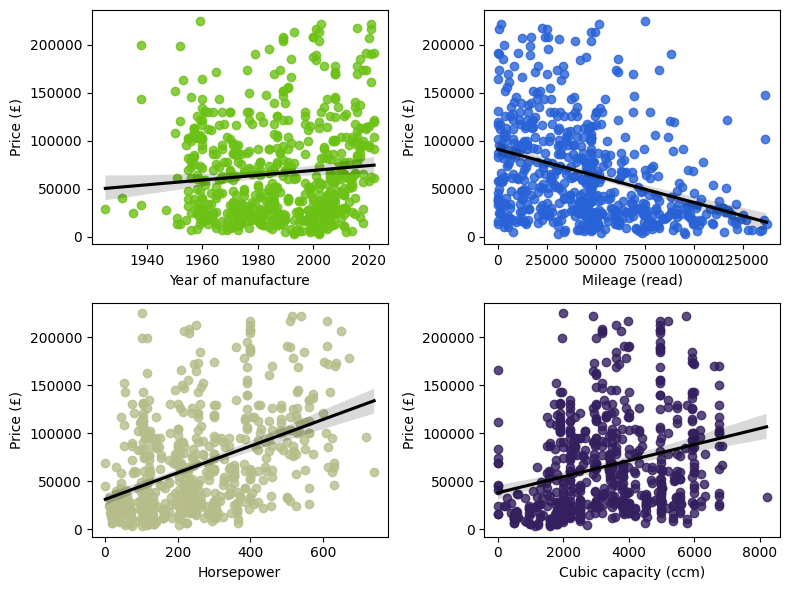

In [41]:
reg_plot(num_cols_df)

In [42]:
num_cols_df

,Year of manufacture,Mileage (read),Horsepower,Cubic capacity (ccm),Price (£)
0,2000,62013,251,1781,14785
1,1979,50952,127,1962,21321
2,1990,124896,147,2849,23061
3,1981,37282,205,2906,126183
4,1966,100041,150,2496,46122
...,...,...,...,...,...
689,2005,18118,528,5935,115000
691,1959,72018,100,2000,29501
692,1983,74499,231,4973,27804
693,1971,47508,130,2341,86936


### 1.3. Tìm mối quan hệ giữa biến `price` và các biến số còn lại

In [43]:
import scipy.stats as stats

In [44]:
def kiemTraMucDoAnhHuong(s1: pd.Series, df_check: pd.DataFrame):
    Pearson_coef,p_value = stats.pearsonr(s1,df_check['Price (£)'])
    if(0.3 <= abs(Pearson_coef) <= 1 and p_value <= 0.05):
        return "Yes", Pearson_coef, p_value
    else:
        return "No", Pearson_coef, p_value
def timBienAnhHuong(df_relevent: pd.DataFrame) -> dict:
    dict_result = {}
    Pearson_coef_result = []
    p_value_result = []
    for col in df_relevent.columns:
        if col != 'Price (£)':
            dict_result[col], Pearson_coefs, p_values  = kiemTraMucDoAnhHuong(df_relevent[col], df_relevent)
            Pearson_coef_result.append(Pearson_coefs)
            p_value_result.append(p_values)
    return dict_result, Pearson_coef_result, p_value_result
num_cols_influence, Pearson_coef_result, p_value_result = timBienAnhHuong(num_cols_df)
data = {
    'Attribute': list(num_cols_influence.keys()),
    'Influence': list(num_cols_influence.values()),
    'Pearson_coef': Pearson_coef_result,
    'P_value': p_value_result
}
num_cols_influence_df = pd.DataFrame(data)
num_cols_influence_df
#Tìm biến ảnh hưởng nhiều nhất, ít nhất:
max_index = num_cols_influence_df['Pearson_coef'].idxmax()
min_index = num_cols_influence_df['Pearson_coef'].idxmin()
max_min_influence = num_cols_influence_df.loc[[max_index, min_index]]
max_min_influence

,Attribute,Influence,Pearson_coef,P_value
2,Horsepower,Yes,0.427824,2.712126e-29
1,Mileage (read),Yes,-0.348100,2.672710e-19


In [45]:
num_cols_influence_df

,Attribute,Influence,Pearson_coef,P_value
0,Year of manufacture,No,0.098204,1.389099e-02
1,Mileage (read),Yes,-0.348100,2.672710e-19
2,Horsepower,Yes,0.427824,2.712126e-29
3,Cubic capacity (ccm),No,0.269445,6.851248e-12


---

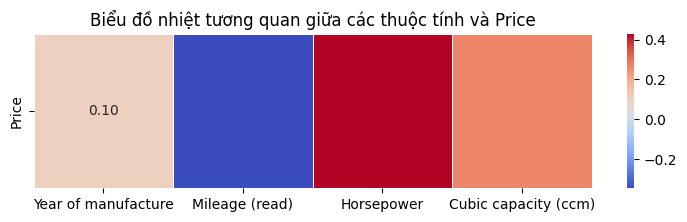

In [46]:
arr = np.array(num_cols_influence_df['Pearson_coef'])

arr_reshaped = arr.reshape(-1, 1)

arr_reshaped_alternative = arr[:, np.newaxis]
plt.figure(figsize=(9, 2))
heatmap = sns.heatmap(arr_reshaped.T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Biểu đồ nhiệt tương quan giữa các thuộc tính và Price')
heatmap.set_xticklabels(num_cols_influence_df['Attribute'], ha='center')
heatmap.set(yticklabels=['Price'])
plt.show()

<div style="border-bottom: 3px solid #000000 ; margin-bottom: 0px;"></div>

## 2. Các biến phân loại

In [47]:
df1 = df.copy()

### 2.1 Gom nhóm cột `Make` thành cột `Type` mới

In [48]:
market_segments = {
    'Luxury': ['Audi','Alfa Romeo','Volvo','Ferrari','Mercedes-Benz','Jaguar','Aston Martin','Bentley',
               'Porsche','BMW','Mercedes-AMG','Maybach','Maserati','Rolls-Royce','Land Rover','Cadillac',
               'Lamborghini','McLaren', 'Lagonda', 'Lombardi', 'Buick', 'AC'],
    'Sports': ['Triumph','Austin-Healey','Lancia','Volkswagen','Citroën','Autokraft','Devin','MG',
               'Austin','Autobianchi','Saab','Subaru','Donkervoort','Mini','Abarth',
               'Elva','Alpine','Riley','Chevrolet','Wiesmann','Pontiac','Pierce-Arrow','Artega',
               'TVR','Morgan','Lotus', 'Rover', 'Cockshutt', 'Ford', 'Mazda', 'Renault'],
    'Compact': ['FIAT','Innocenti','Goliath','Suzuki','Mercury','Dodge','Datsun','Honda','ISO',
                'Plymouth','Chrysler','Victoria','Glas','Piaggio']
}

In [49]:
len(df1['Make'].unique())

67

In [50]:
print(len(market_segments['Luxury']), len(market_segments['Sports']), len(market_segments['Compact']))

22 31 14


In [51]:
merged_set = set(market_segments['Luxury'] + market_segments['Sports'] + market_segments['Compact'])

#Kiểm tra lại các phần tử có đầy đủ hay không?
differences = list(set(df['Make'].unique()) - merged_set)
differences

[]

In [52]:
#type_car = []
#for i in range(len(df1)):
#    if(df1['Make'][i] in market_segments['Luxury']):
#        type_car.append('Luxury')
#    elif df1['Make'][i] in market_segments['Sports']:
#        type_car.append('Sports')
#    else: 
#        type_car.append('Compact')
#df1.insert(df1.columns.get_loc('Make')+1, 'Type', type_car)
# Tạo cột 'Type' dựa trên 'Make' và 'market_segments'
df1['Type'] = df1['Make'].apply(lambda make: next((segment for segment, makes in market_segments.items() if make in makes), 'Unknown'))

# Chèn cột 'Type' sau cột 'Make'
df1.insert(df.columns.get_loc('Make') + 1, 'Type', df1.pop('Type'))

In [53]:
df1

,Make,Type,Model,Year of manufacture,Mileage (read),Previous owners,Body style,Horsepower,Cubic capacity (ccm),Cylinders,Doors,Steering,Gearbox,Gears,Transmission,Front breaks,Rear breaks,Fuel type,Price (£)
0,Audi,Luxury,TT 1.8 T quattro,2000,62013,3,Coupe,251,1781,4,2,Left (LHD),Manual,6,4WD,Disc,Disc,Petrol,14785
1,Alfa Romeo,Luxury,2000 Spider Veloce,1979,50952,> 6,Convertible,127,1962,4,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,21321
2,Volvo,Luxury,780 Bertone 2.8 V6,1990,124896,3,Coupe,147,2849,6,2,Left (LHD),Automatic,4,Rear,Disc,Disc,Petrol,23061
3,Ferrari,Luxury,308 GTSi (US),1981,37282,3,Convertible (Targa),205,2906,8,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,126183
4,Mercedes-Benz,Luxury,250 SE,1966,100041,5,Coupe,150,2496,6,2,Left (LHD),Manual,4,Rear,Disc,Disc,Petrol,46122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,Aston Martin,Luxury,Project Vantage,2000,7,1,Coupe,485,5935,12,2,Left (LHD),Manual,6,Rear,Disc,Disc,Petrol,450000
691,Triumph,Sports,TR 3A,1959,72018,3,Convertible (Roadster),100,2000,4,2,Left (LHD),Manual,4,Rear,Disc,Drum,Petrol,29501
692,Mercedes-Benz,Luxury,500 SL,1983,74499,> 6,Convertible (Roadster),231,4973,8,2,Left (LHD),Automatic,4,Rear,Disc,Disc,Petrol,27804
693,Porsche,Luxury,911 2.4 T,1971,47508,2,Coupe,130,2341,6,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,86936


### 2.2 Định dạng lại dữ liệu cột `Body style`

In [54]:
df1['Body style'].value_counts()

Coupe                        228
Convertible (Roadster)       158
Convertible                   91
Saloon (4-doors)              87
4x4                           31
Saloon (2-doors)              17
Convertible (Targa)           14
Small car (Small Car)          7
Estate                         7
Coupe (Targa)                  6
Bus                            6
4x4 (Open)                     6
Saloon (5-doors)               4
Saloon                         3
Saloon (3-doors)               3
Coupe (Hatchback)              3
Small car (Convertible)        2
Convertible (2-doors)          2
Bus (Camper)                   2
Racing car                     2
Coupe (Racing car)             2
Utility Vehicle                1
Utility Vehicle (Tractor)      1
4x4 (Military vehicle)         1
Bus (Panel Van)                1
4x4 (Pick-up)                  1
Van (Estate)                   1
Estate (Panel Van)             1
Racing car (Open)              1
Pick-up                        1
Convertibl

In [55]:
df1['Body style'] = df1['Body style'].str.split().str[0]
df1['Body style'].unique()

array(['Coupe', 'Convertible', 'Saloon', 'Pick-up', 'Racing', '4x4',
       'Estate', 'Van', 'Bus', 'Small', 'Utility'], dtype=object)

---

### 2.3 Plot biến phân loại 

In [56]:
obj_cols = df1.select_dtypes(include = 'object').columns.tolist()
obj_cols

['Make',
 'Type',
 'Model',
 'Previous owners',
 'Body style',
 'Cylinders',
 'Doors',
 'Steering',
 'Gearbox',
 'Gears',
 'Transmission',
 'Front breaks',
 'Rear breaks',
 'Fuel type']

In [57]:
obj_cols_df = df1.select_dtypes('object')
obj_cols_df = obj_cols_df.drop(df1[['Make', 'Model']], axis = 1)
obj_cols_df = pd.concat([obj_cols_df, df1['Price (£)']], axis=1)

In [58]:
len(obj_cols_df.columns)

13

### 2.4 Xóa bỏ các giá trị có số lần xuất hiện ít

In [59]:
obj_cols_df

,Type,Previous owners,Body style,Cylinders,Doors,Steering,Gearbox,Gears,Transmission,Front breaks,Rear breaks,Fuel type,Price (£)
0,Luxury,3,Coupe,4,2,Left (LHD),Manual,6,4WD,Disc,Disc,Petrol,14785
1,Luxury,> 6,Convertible,4,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,21321
2,Luxury,3,Coupe,6,2,Left (LHD),Automatic,4,Rear,Disc,Disc,Petrol,23061
3,Luxury,3,Convertible,8,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,126183
4,Luxury,5,Coupe,6,2,Left (LHD),Manual,4,Rear,Disc,Disc,Petrol,46122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,Luxury,1,Coupe,12,2,Left (LHD),Manual,6,Rear,Disc,Disc,Petrol,450000
691,Sports,3,Convertible,4,2,Left (LHD),Manual,4,Rear,Disc,Drum,Petrol,29501
692,Luxury,> 6,Convertible,8,2,Left (LHD),Automatic,4,Rear,Disc,Disc,Petrol,27804
693,Luxury,2,Coupe,6,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,86936


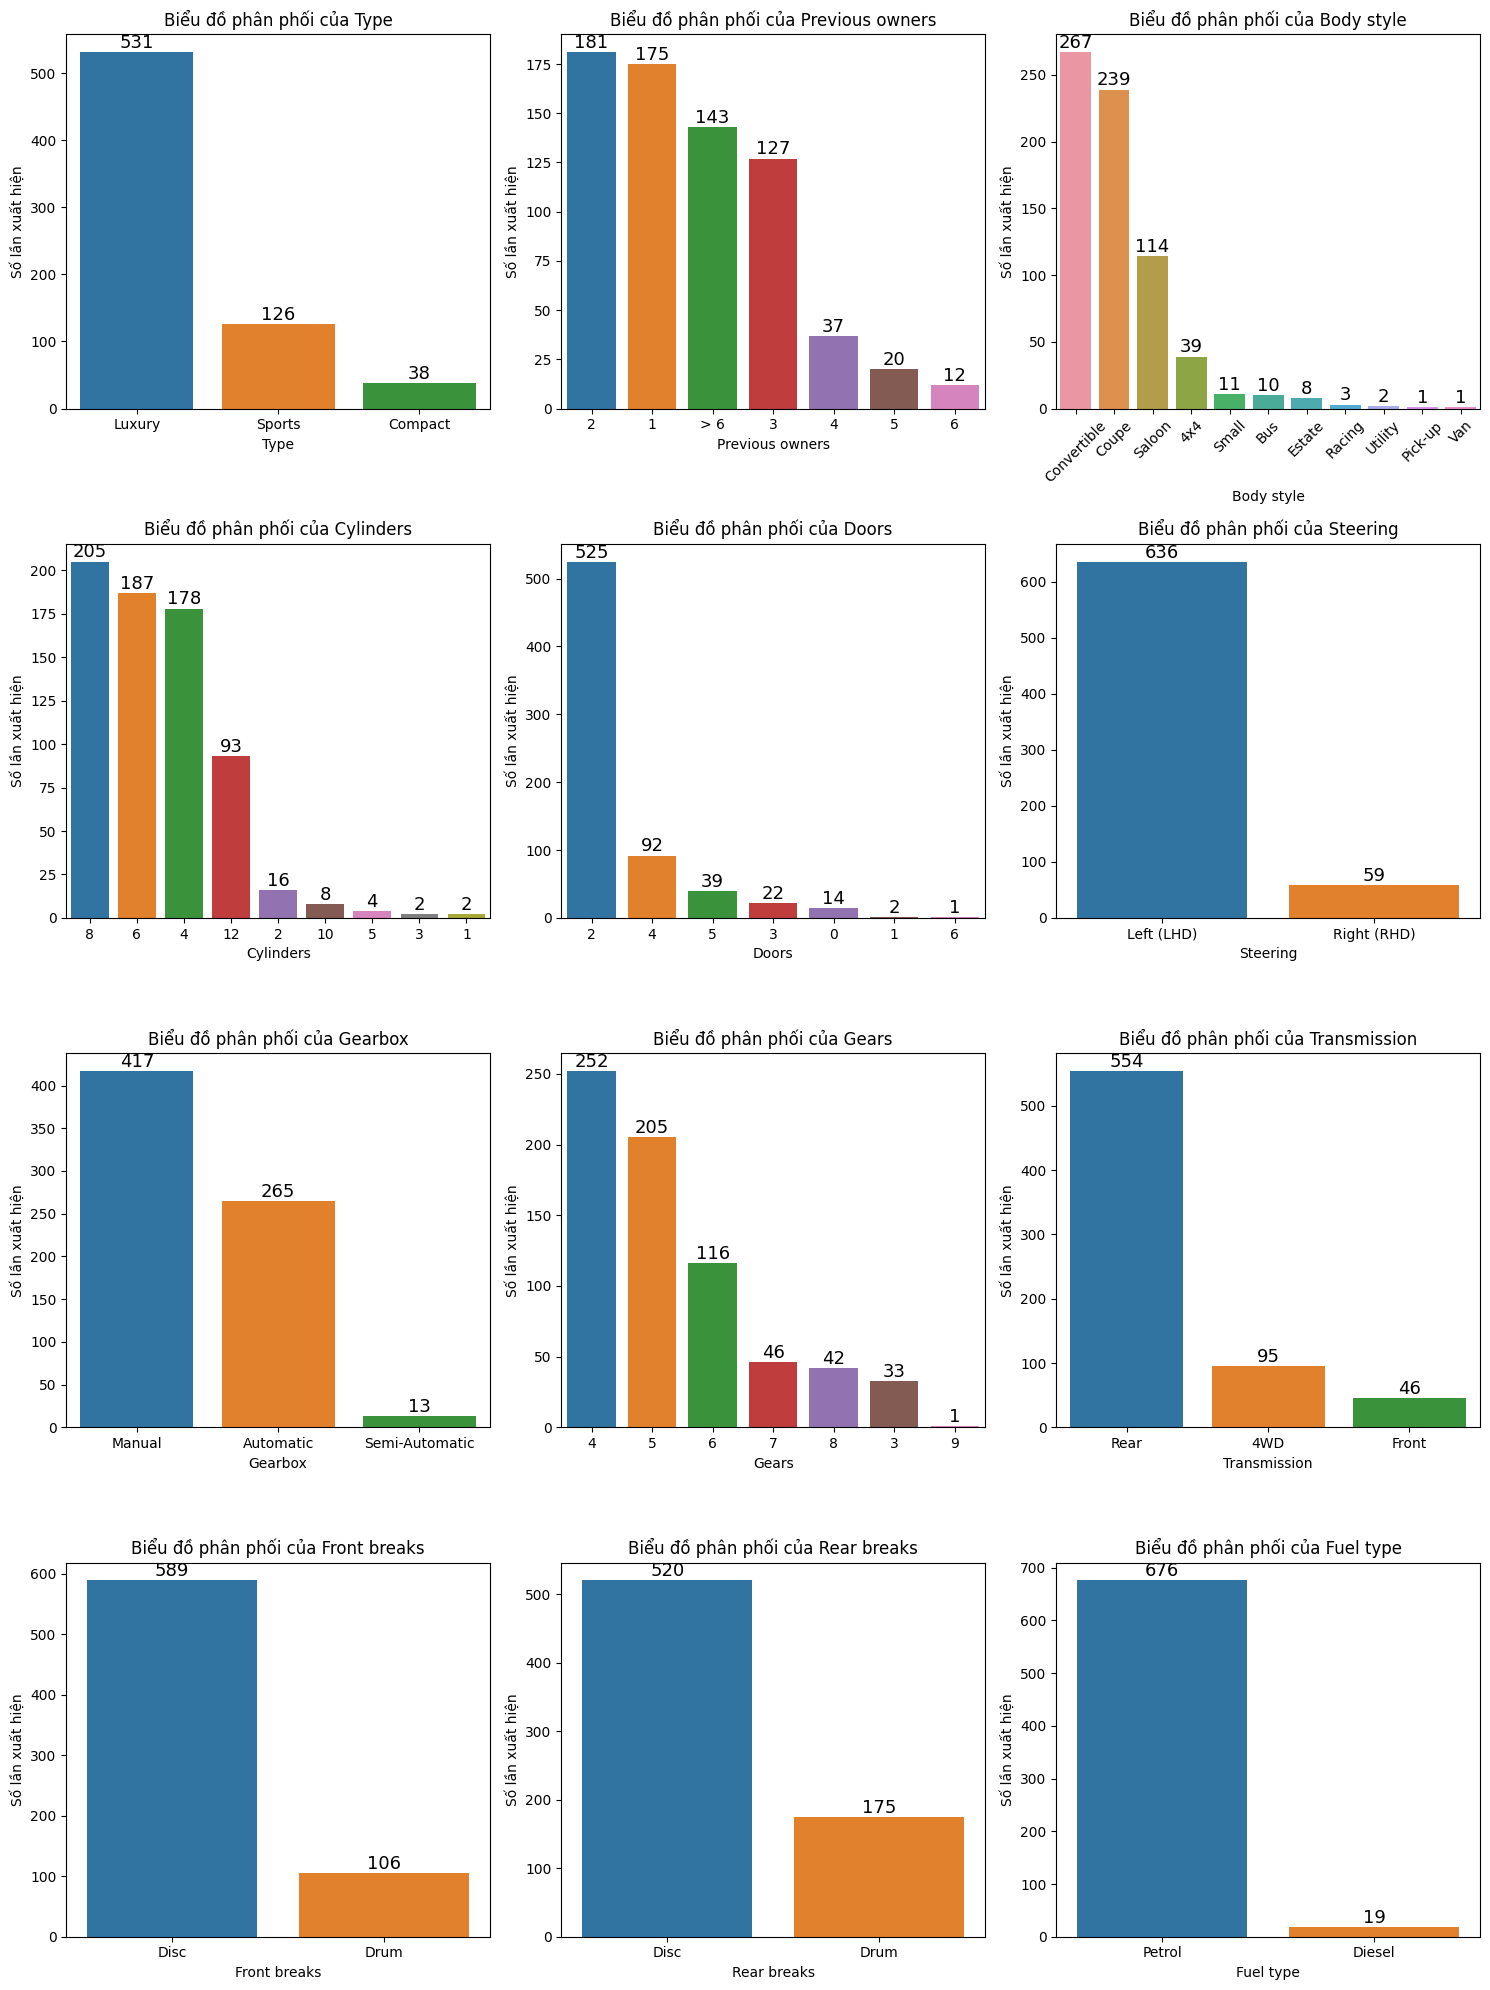

In [60]:
num_cols = 3
num_rows = len(obj_cols_df.columns) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, variable_name in enumerate(obj_cols_df.columns):
    row = i // num_cols
    col = i % num_cols
    if variable_name != 'Price (£)':
        variable_counts = obj_cols_df[variable_name].value_counts().reset_index()
        variable_counts.columns = [variable_name, 'Số lần xuất hiện']
        sns.barplot(x=variable_name, y='Số lần xuất hiện', data=variable_counts, ax=axes[row, col])
        
        for index, value in enumerate(variable_counts['Số lần xuất hiện']):
            axes[row, col].text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=13)
        
        if variable_name == 'Body style':
            axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
        axes[row, col].set_title(f'Biểu đồ phân phối của {variable_name}')

plt.tight_layout()


In [61]:
obj_cols_df = obj_cols_df[obj_cols_df['Gears'] != '9']


In [62]:
obj_cols_df = obj_cols_df[~obj_cols_df['Doors'].isin(['0', '1', '6'])]

In [63]:
obj_cols_df = obj_cols_df[~obj_cols_df['Body style'].isin(['Utility', 'Van', 'Pick-up', 'Racing', 'Estate'])]

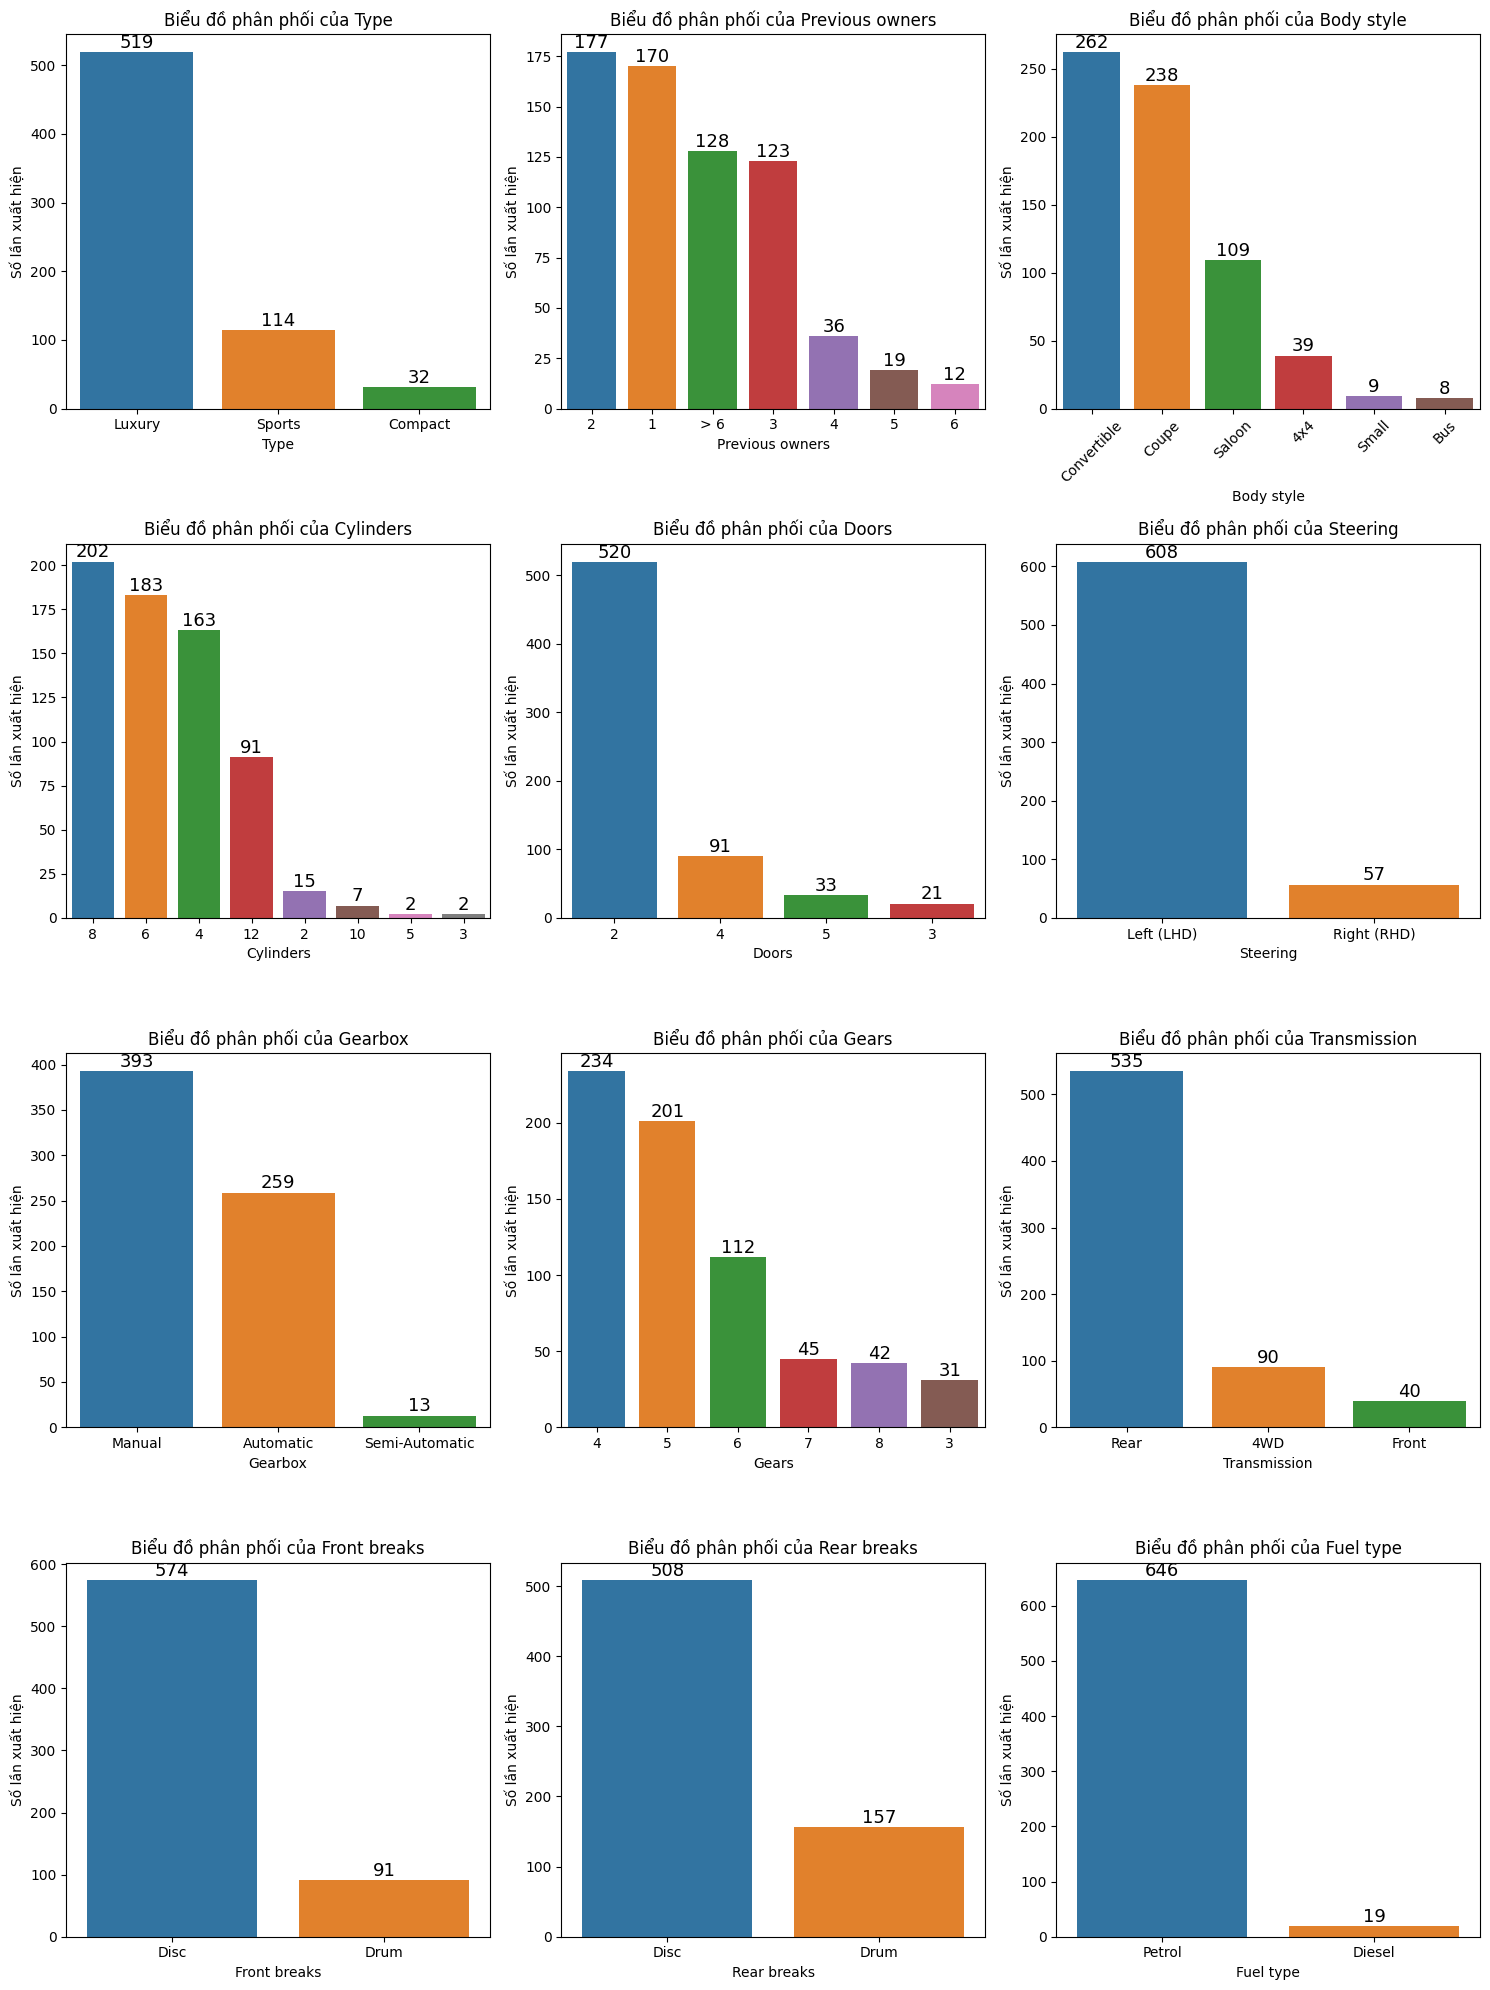

In [64]:
num_columns = 3
num_rows = len(obj_cols_df.columns) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

for i, variable_name in enumerate(obj_cols_df.columns):
    row = i // num_columns
    col = i % num_columns
    if variable_name != 'Price (£)':
        variable_counts = obj_cols_df[variable_name].value_counts().reset_index()
        variable_counts.columns = [variable_name, 'Số lần xuất hiện']
        sns.barplot(x=variable_name, y='Số lần xuất hiện', data=variable_counts, ax=axes[row, col])
        
        for index, value in enumerate(variable_counts['Số lần xuất hiện']):
            axes[row, col].text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=13)
        
        if variable_name == 'Body style':
            axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
        axes[row, col].set_title(f'Biểu đồ phân phối của {variable_name}')

plt.tight_layout()

plt.show()

--- 

### 2.5. Tìm mối quan hệ giữa biến `price` và các biến phân loại (ANOVA)

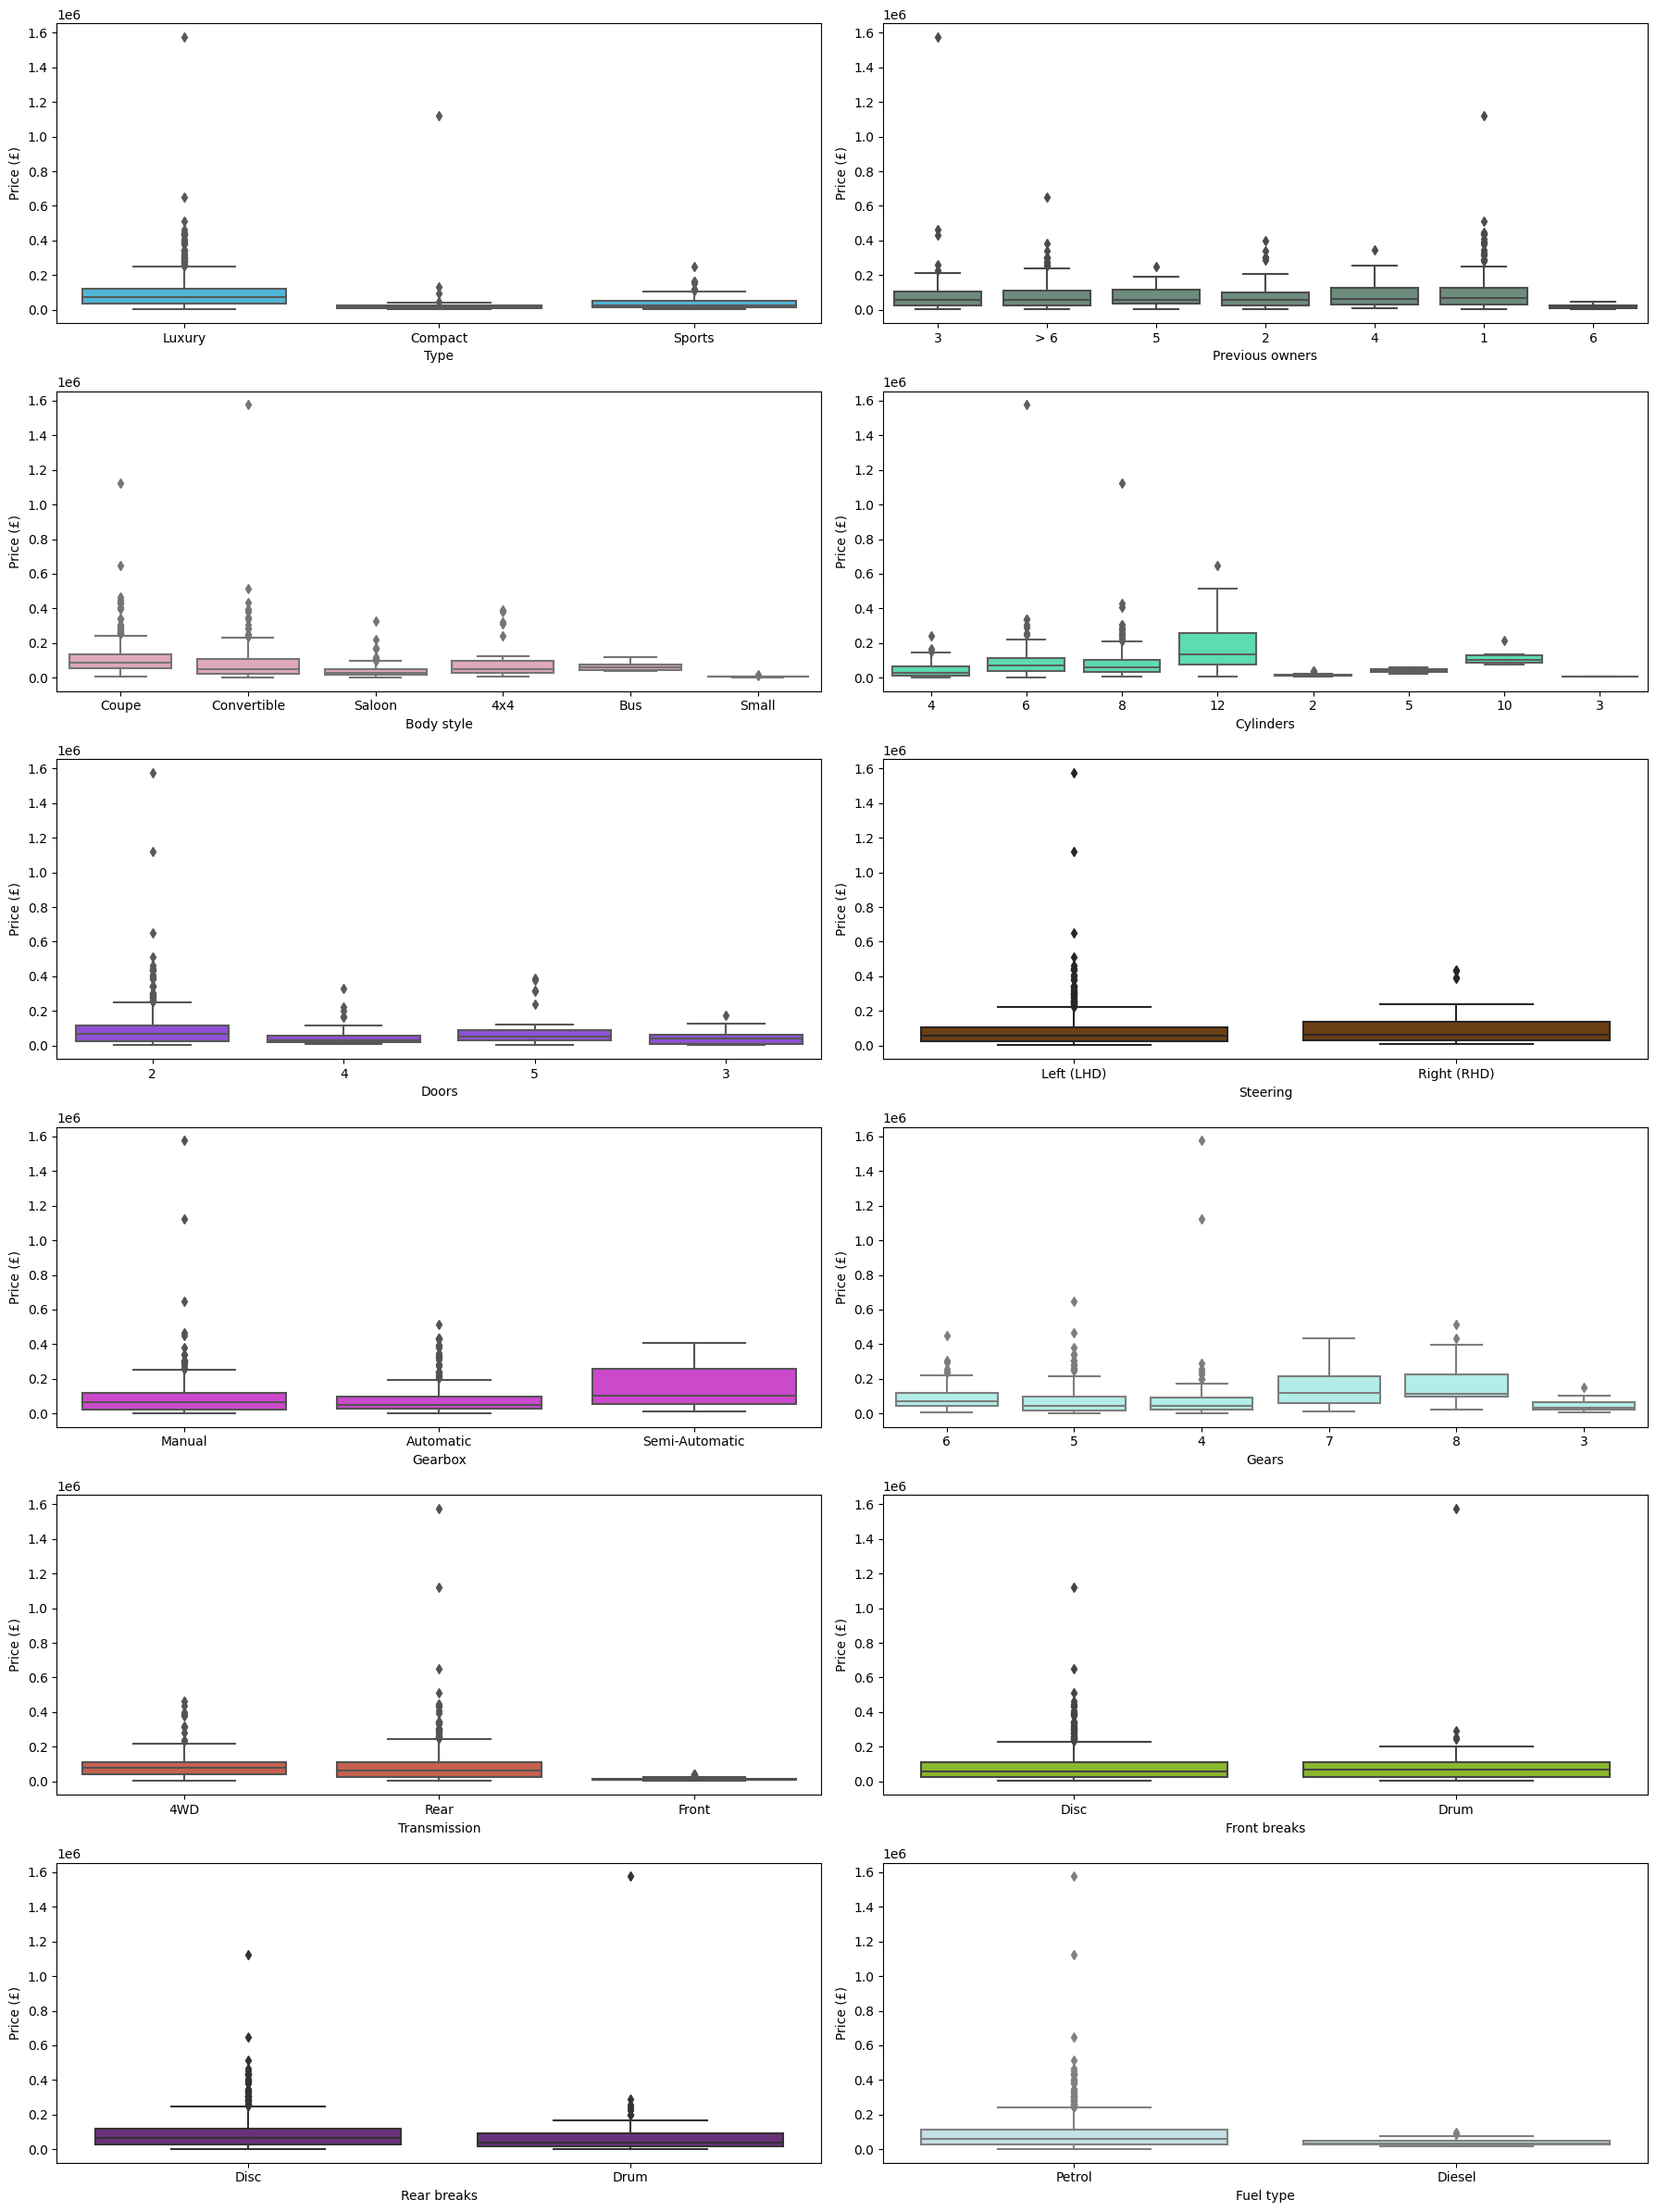

In [65]:
def box_plot(dataframe):
    length = len(dataframe.columns) - 1
    #k = random.randint(2, length//2)
    #while (length%k != 0):
        #k = random.randint(2,length//2)
    #x = length // k
    flag = True
    while(flag == True):
        k = random.randint(2,length//2)
        if(length%k == 0):
            flag = False
    height_ratios = [4] * (length // k)
    width_ratios = [9] * k
    #fig, axes = plt.subplots(length//k, k , figsize=(20, 15))
    fig, axes = plt.subplots(length // k, k, figsize=(sum(width_ratios), sum(height_ratios)),
                             gridspec_kw={'height_ratios': height_ratios, 'width_ratios': width_ratios})
    
    for i, column in enumerate([col for col in dataframe if col != "Price (£)"]):
        colors_1 = random.random()
        colors_2 = random.random()
        colors_3 = random.random()
        sns.boxplot(data=dataframe, x=column, y="Price (£)", ax=axes[i // k, i % k], color = (colors_1,colors_2,colors_3)) 
        plt.tight_layout()

box_plot(obj_cols_df)
plt.show()

In [67]:
categorical_vars = obj_cols_df.select_dtypes(include=['object']).columns
significant_categorical_variables = []
p_value_list = []
f_test = []

for col in categorical_vars:
    new_df = obj_cols_df[[col, 'Price (£)']]


    groups = []
    for value in new_df[col].unique():
        group = new_df[new_df[col] == value]['Price (£)']
        groups.append(group)


    f_statistic, p_value = f_oneway(*groups)


    if p_value < 0.05:
        significant_categorical_variables.append(col)
        p_value_list.append(p_value)
        f_test.append(f_statistic)

data = {
    'Attribute': significant_categorical_variables,
    'F_test': f_test,
    'P_value': p_value_list
}
obj_cols_influence_df = pd.DataFrame(data)
obj_cols_influence_df



,Attribute,F_test,P_value
0,Type,16.857590,7.230609e-08
1,Previous owners,2.601824,1.686460e-02
2,Body style,8.207316,1.564596e-07
3,Cylinders,14.533975,1.189784e-17
4,Doors,5.978946,5.044953e-04
5,Gears,11.489827,1.183952e-10
6,Transmission,10.171318,4.458248e-05
7,Rear breaks,6.462447,1.124419e-02


---

### 2.6 Kết hợp các cột số và cột phân loại thành một df sau đó tiến hành bước tiếp theo

In [68]:
def merge_df (dfX, dfY):
    merge = pd.merge(dfX, dfY, left_index=True, right_index=True, how='inner')
    merge.columns = [col.split('_')[0] if col.endswith('_x') else col for col in merge.columns]
    merge.columns = [col.split('_')[0] if col.endswith('_y') else col for col in merge.columns]
    merge = merge.loc[:,~merge.columns.duplicated()]
    return merge

In [69]:
obj_cols_df

,Type,Previous owners,Body style,Cylinders,Doors,Steering,Gearbox,Gears,Transmission,Front breaks,Rear breaks,Fuel type,Price (£)
0,Luxury,3,Coupe,4,2,Left (LHD),Manual,6,4WD,Disc,Disc,Petrol,14785
1,Luxury,> 6,Convertible,4,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,21321
2,Luxury,3,Coupe,6,2,Left (LHD),Automatic,4,Rear,Disc,Disc,Petrol,23061
3,Luxury,3,Convertible,8,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,126183
4,Luxury,5,Coupe,6,2,Left (LHD),Manual,4,Rear,Disc,Disc,Petrol,46122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,Luxury,1,Coupe,12,2,Left (LHD),Manual,6,Rear,Disc,Disc,Petrol,450000
691,Sports,3,Convertible,4,2,Left (LHD),Manual,4,Rear,Disc,Drum,Petrol,29501
692,Luxury,> 6,Convertible,8,2,Left (LHD),Automatic,4,Rear,Disc,Disc,Petrol,27804
693,Luxury,2,Coupe,6,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,86936


In [70]:
num_cols_df

,Year of manufacture,Mileage (read),Horsepower,Cubic capacity (ccm),Price (£)
0,2000,62013,251,1781,14785
1,1979,50952,127,1962,21321
2,1990,124896,147,2849,23061
3,1981,37282,205,2906,126183
4,1966,100041,150,2496,46122
...,...,...,...,...,...
689,2005,18118,528,5935,115000
691,1959,72018,100,2000,29501
692,1983,74499,231,4973,27804
693,1971,47508,130,2341,86936


In [71]:
mining_col_df = merge_df(df, num_cols_df)

In [72]:
#mining_df = pd.merge(df1, obj_cols_df, left_index=True, right_index=True, how='inner')
#mining_df.columns = [col.split('_')[0] if col.endswith('_x') else col for col in mining_df.columns]
#mining_df.columns = [col.split('_')[0] if col.endswith('_y') else col for col in mining_df.columns]
#mining_df = mining_df.loc[:,~mining_df.columns.duplicated()]

In [73]:
mining_obj_df = merge_df(df1, obj_cols_df)

In [74]:
mining_df = merge_df(mining_col_df, mining_obj_df)

In [75]:
mining_df =mining_df.reset_index(drop=True)
mining_df

,Make,Model,Year of manufacture,Mileage (read),Previous owners,Body style,Horsepower,Cubic capacity (ccm),Cylinders,Doors,Steering,Gearbox,Gears,Transmission,Front breaks,Rear breaks,Fuel type,Price (£),Type
0,Audi,TT 1.8 T quattro,2000,62013,3,Coupe,251,1781,4,2,Left (LHD),Manual,6,4WD,Disc,Disc,Petrol,14785,Luxury
1,Alfa Romeo,2000 Spider Veloce,1979,50952,> 6,Convertible,127,1962,4,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,21321,Luxury
2,Volvo,780 Bertone 2.8 V6,1990,124896,3,Coupe,147,2849,6,2,Left (LHD),Automatic,4,Rear,Disc,Disc,Petrol,23061,Luxury
3,Ferrari,308 GTSi (US),1981,37282,3,Convertible (Targa),205,2906,8,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,126183,Luxury
4,Mercedes-Benz,250 SE,1966,100041,5,Coupe,150,2496,6,2,Left (LHD),Manual,4,Rear,Disc,Disc,Petrol,46122,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Aston Martin,V12 Vanquish S,2005,18118,3,Coupe,528,5935,12,2,Right (RHD),Manual,6,Rear,Disc,Disc,Petrol,115000,Luxury
598,Triumph,TR 3A,1959,72018,3,Convertible (Roadster),100,2000,4,2,Left (LHD),Manual,4,Rear,Disc,Drum,Petrol,29501,Sports
599,Mercedes-Benz,500 SL,1983,74499,> 6,Convertible (Roadster),231,4973,8,2,Left (LHD),Automatic,4,Rear,Disc,Disc,Petrol,27804,Luxury
600,Porsche,911 2.4 T,1971,47508,2,Coupe,130,2341,6,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,86936,Luxury


---

**Các cột ngoại lệ của biến phân loại**

In [76]:
result_df1 = pd.concat([df1, mining_df]).drop_duplicates(keep=False)

In [77]:
result_df1

,Make,Type,Model,Year of manufacture,Mileage (read),Previous owners,Body style,Horsepower,Cubic capacity (ccm),Cylinders,Doors,Steering,Gearbox,Gears,Transmission,Front breaks,Rear breaks,Fuel type,Price (£)
3,Ferrari,Luxury,308 GTSi (US),1981,37282,3,Convertible,205,2906,8,2,Left (LHD),Manual,5,Rear,Disc,Disc,Petrol,126183
7,FIAT,Compact,500 L,1971,3107,2,Saloon,18,499,2,2,Left (LHD),Manual,4,Rear,Drum,Drum,Petrol,10443
8,Triumph,Sports,TR 6,1971,26024,4,Convertible,98,2498,6,2,Left (LHD),Manual,4,Rear,Disc,Drum,Petrol,21669
10,Bentley,Luxury,Arnage R,2005,73955,3,Saloon,456,6750,8,4,Right (RHD),Automatic,4,Rear,Disc,Disc,Petrol,34895
16,Ford,Sports,F-1,1947,59762,1,Pick-up,91,3700,6,2,Left (LHD),Manual,3,Rear,Drum,Drum,Petrol,28282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,Piaggio,Compact,Vespa 400,1961,32354,> 6,Small car (Convertible),14,400,2,2,Left (LHD),Manual,4,Rear,Drum,Drum,Petrol,17187
593,Bentley,Luxury,Flying Spur W12,2013,10300,3,Saloon (4-doors),625,5998,12,4,Right (RHD),Automatic,8,4WD,Disc,Disc,Petrol,59995
595,Audi,Luxury,TT 1.8 T,2008,109803,1,Convertible (Roadster),163,1798,4,2,Left (LHD),Manual,5,Front,Disc,Disc,Petrol,12966
598,Triumph,Sports,TR 3A,1959,72018,3,Convertible (Roadster),100,2000,4,2,Left (LHD),Manual,4,Rear,Disc,Drum,Petrol,29501


In [78]:
len(result_df1.columns)

19

---

**Gom nhóm (Body style, Transmisson và Price)**

/var/folders/_0/q7r175hj2m34g8xl8vtw_ycw0000gn/T/ipykernel_4406/3063583904.py:10: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


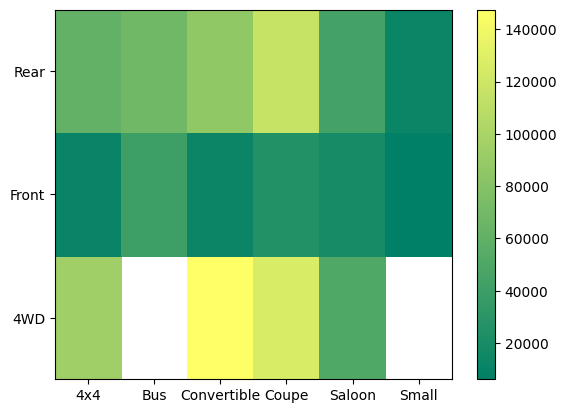

In [79]:
df_test = obj_cols_df[['Body style','Transmission', 'Price (£)']]
df_test
df_grp = df_test.groupby(['Body style','Transmission'], as_index = False).mean()
df_grp
df_pivot = df_grp.pivot(index='Transmission', columns='Body style', values='Price (£)')
df_pivot
plt.pcolor(df_pivot, cmap='summer')
plt.xticks(np.arange(0.5, len(df_pivot.columns), 1), df_pivot.columns)
plt.yticks(np.arange(0.5, len(df_pivot.index), 1), df_pivot.index)
plt.colorbar()
plt.show()

## Chương IV: Xây dựng và phát triển mô hình

In [80]:
cleaned_df = merge_df(mining_df[max_min_influence['Attribute']], mining_df[obj_cols_influence_df['Attribute']])
cleaned_df

,Horsepower,Mileage (read),Type,Previous owners,Body style,Cylinders,Doors,Gears,Transmission,Rear breaks
0,251,62013,Luxury,3,Coupe,4,2,6,4WD,Disc
1,127,50952,Luxury,> 6,Convertible,4,2,5,Rear,Disc
2,147,124896,Luxury,3,Coupe,6,2,4,Rear,Disc
3,205,37282,Luxury,3,Convertible (Targa),8,2,5,Rear,Disc
4,150,100041,Luxury,5,Coupe,6,2,4,Rear,Disc
...,...,...,...,...,...,...,...,...,...,...
597,528,18118,Luxury,3,Coupe,12,2,6,Rear,Disc
598,100,72018,Sports,3,Convertible (Roadster),4,2,4,Rear,Drum
599,231,74499,Luxury,> 6,Convertible (Roadster),8,2,4,Rear,Disc
600,130,47508,Luxury,2,Coupe,6,2,5,Rear,Disc


In [81]:
price = pd.DataFrame(data=mining_df['Price (£)'])
cleaned_df = merge_df(cleaned_df, price)


In [82]:
cleaned_df

,Horsepower,Mileage (read),Type,Previous owners,Body style,Cylinders,Doors,Gears,Transmission,Rear breaks,Price (£)
0,251,62013,Luxury,3,Coupe,4,2,6,4WD,Disc,14785
1,127,50952,Luxury,> 6,Convertible,4,2,5,Rear,Disc,21321
2,147,124896,Luxury,3,Coupe,6,2,4,Rear,Disc,23061
3,205,37282,Luxury,3,Convertible (Targa),8,2,5,Rear,Disc,126183
4,150,100041,Luxury,5,Coupe,6,2,4,Rear,Disc,46122
...,...,...,...,...,...,...,...,...,...,...,...
597,528,18118,Luxury,3,Coupe,12,2,6,Rear,Disc,115000
598,100,72018,Sports,3,Convertible (Roadster),4,2,4,Rear,Drum,29501
599,231,74499,Luxury,> 6,Convertible (Roadster),8,2,4,Rear,Disc,27804
600,130,47508,Luxury,2,Coupe,6,2,5,Rear,Disc,86936


**Chuẩn hóa dữ liệu kiểu số**

In [83]:
numeric_df = cleaned_df.select_dtypes(include = 'number')
numeric_df.drop(cleaned_df.columns[-1], axis=1, inplace=True)
numeric_df

,Horsepower,Mileage (read)
0,251,62013
1,127,50952
2,147,124896
3,205,37282
4,150,100041
...,...,...
597,528,18118
598,100,72018
599,231,74499
600,130,47508


In [85]:
numeric_df_z = zsc(numeric_df)
numeric_df_z

,Horsepower,Mileage (read)
0,-0.023276,0.517140
1,-0.817384,0.172682
2,-0.689302,2.475419
3,-0.317865,-0.253024
4,-0.670090,1.701394
...,...,...
597,1.750660,-0.849822
598,-0.990295,0.828712
599,-0.151358,0.905974
600,-0.798172,0.065431


In [86]:
SCALE = StandardScaler()
numeric_df_s = SCALE.fit_transform(numeric_df)

In [87]:
df_scaled = pd.DataFrame(numeric_df_s, columns=numeric_df.columns)
df_scaled

,Horsepower,Mileage (read)
0,-0.023276,0.517140
1,-0.817384,0.172682
2,-0.689302,2.475419
3,-0.317865,-0.253024
4,-0.670090,1.701394
...,...,...
597,1.750660,-0.849822
598,-0.990295,0.828712
599,-0.151358,0.905974
600,-0.798172,0.065431


**Chuẩn hóa dữ liệu kiểu phân loại**

In [89]:
LE = LabelEncoder()

In [90]:
object_df = cleaned_df.select_dtypes(include = ['object'])
object_df

,Type,Previous owners,Body style,Cylinders,Doors,Gears,Transmission,Rear breaks
0,Luxury,3,Coupe,4,2,6,4WD,Disc
1,Luxury,> 6,Convertible,4,2,5,Rear,Disc
2,Luxury,3,Coupe,6,2,4,Rear,Disc
3,Luxury,3,Convertible (Targa),8,2,5,Rear,Disc
4,Luxury,5,Coupe,6,2,4,Rear,Disc
...,...,...,...,...,...,...,...,...
597,Luxury,3,Coupe,12,2,6,Rear,Disc
598,Sports,3,Convertible (Roadster),4,2,4,Rear,Drum
599,Luxury,> 6,Convertible (Roadster),8,2,4,Rear,Disc
600,Luxury,2,Coupe,6,2,5,Rear,Disc


In [91]:
for col in object_df.columns:
    object_df[col] = LE.fit_transform(object_df[col])

In [92]:
object_df

,Type,Previous owners,Body style,Cylinders,Doors,Gears,Transmission,Rear breaks
0,1,2,12,4,0,3,0,0
1,1,6,7,4,0,2,2,0
2,1,2,12,6,0,1,2,0
3,1,2,11,7,0,2,2,0
4,1,4,12,6,0,1,2,0
...,...,...,...,...,...,...,...,...
597,1,2,12,1,0,3,2,0
598,2,2,9,4,0,1,2,1
599,1,6,9,7,0,1,2,0
600,1,1,12,6,0,2,2,0


**Xây dựng mô hình**

In [94]:
def plot_predictions_subplot(ax, y_true, y_pred, model_name):
    sns.regplot(x=y_true, y=y_pred, scatter_kws={'s': 20, 'alpha': 0.5}, ax=ax)
    ax.set_title(f"{model_name} - Actual vs. Predicted")
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")

def evaluate_model_subplot(ax, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    plot_predictions_subplot(ax, y_test, y_pred, str(model))
    return r2, mse, rmse

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    return r2, mse, rmse

def find_best_random_state(X, y, model, metric=mean_squared_error):
    best_random_state = None
    best_score = float('inf') 

    for random_state in range(1000): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        model.fit(X_train, y_train)
        r2, mse, rmse = evaluate_model(model, X_test, y_test)
        score = metric(y_test, model.predict(X_test))

        if score < best_score:
            best_score = score
            best_random_state = random_state

    return best_random_state, {'r2': r2, 'mse': mse, 'rmse': rmse}

def train_and_evaluate_linear_models(X, y):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle("Linear Models Evaluation - 2x2 Subplots")

    best_random_state, best_metrics = find_best_random_state(X, y, LinearRegression())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state)

    models = {'Linear Regression': LinearRegression(),
              'Ridge': Ridge(),
              'Lasso': Lasso(),
              'Random Forest': RandomForestRegressor()}

    param_grids = {'Linear Regression': {},
                   'Ridge': {'alpha': [0.1, 0.5, 1, 10], 'max_iter': [100, 250, 500, 1000]},
                   'Lasso': {'alpha': [0.1, 0.5, 1, 10], 'max_iter': [100, 250, 500, 1000]},
                   'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}}

    row, col = 0, 0
    for model_name, model in models.items():
        ax = axs[row, col]
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        r2, mse, rmse = evaluate_model_subplot(ax, best_model, X_test, y_test)
        ax.text(-0.1, -0.37, f"R² Score: {r2:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nBest Parameters: {grid_search.best_params_}\nBest random state: {best_random_state}",
        size=10, ha="left", transform=ax.transAxes)
        ax.set_title(f"Model: {model_name}")
        ax.set_xlabel("Actual Values")
        ax.set_ylabel("Predicted Values")
        col += 1
        if col == 2:
            row += 1
            col = 0

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



In [95]:
input_model = merge_df(object_df, df_scaled)

In [96]:
target_model = mining_df['Price (£)']

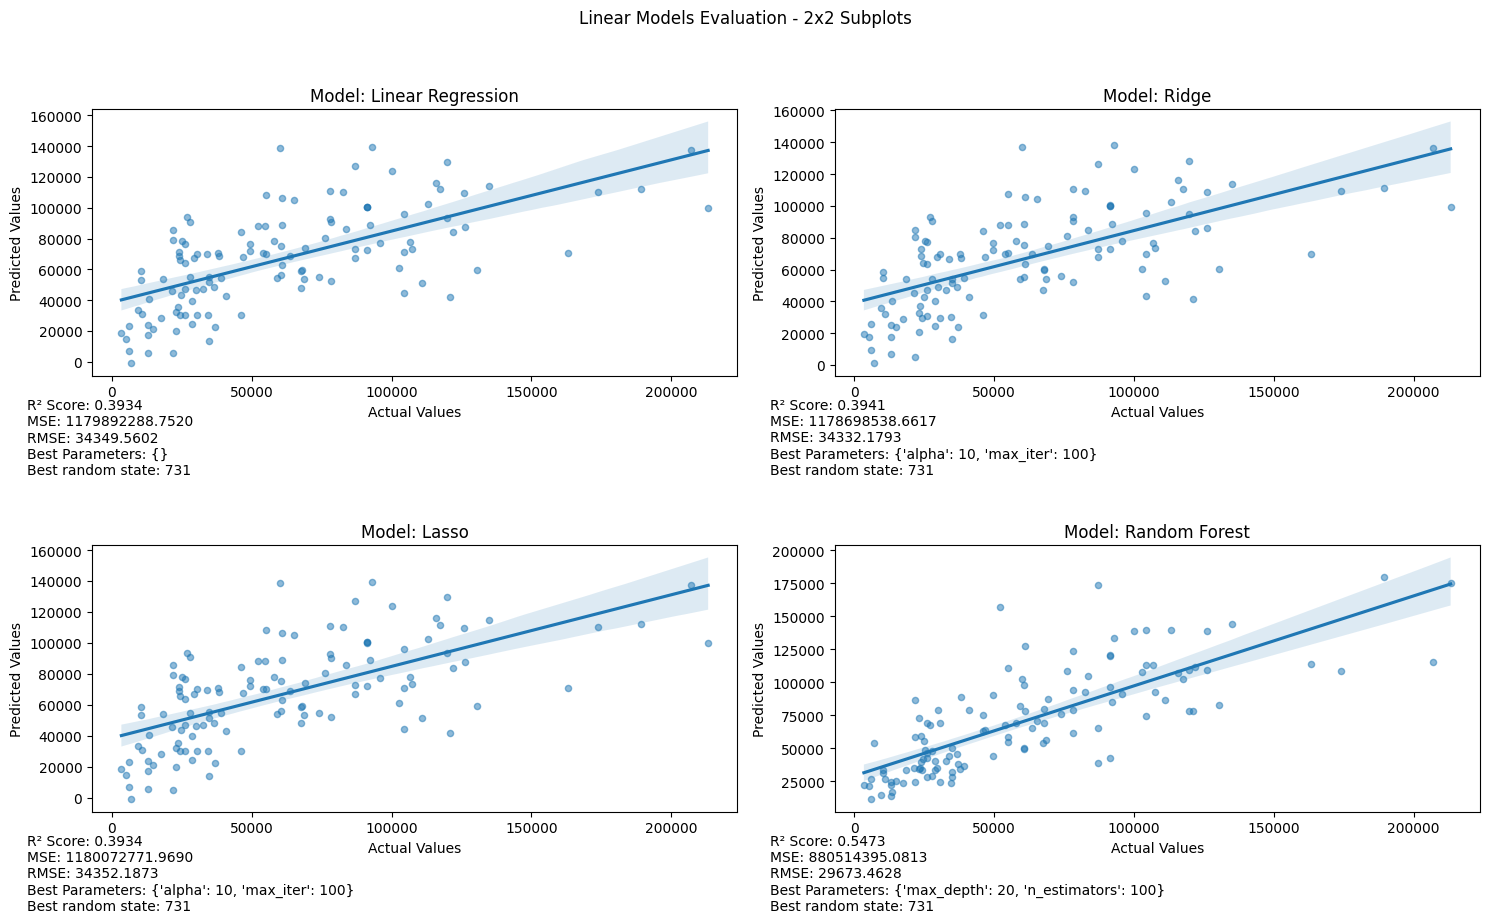

In [97]:
train_and_evaluate_linear_models(input_model,target_model)